In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [103]:
book_data = pd.read_csv("Books.csv")
book_data.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [104]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   BookTitle          271360 non-null  object
 2   BookAuthor         271359 non-null  object
 3   YearOfPublication  271360 non-null  object
 4   Publisher          271358 non-null  object
 5   ImageURLS          271360 non-null  object
 6   ImageURLM          271360 non-null  object
 7   ImageURLL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [105]:
book_data.shape

(271360, 8)

In [106]:
users_data= pd.read_csv('Users.csv')
users_data.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [107]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [108]:
users_data.shape

(278858, 3)

In [109]:
ratings_data = pd.read_csv("Ratings.csv")
ratings_data.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [110]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   BookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [111]:
ratings_data.shape

(1149780, 3)

## Data Preparation( Cleaning and Feature Engineering)

In [112]:
book_data.drop(['ImageURLS','ImageURLL'], axis= 1, inplace= True)

In [113]:
pd.set_option('display.max_colwidth', -1)

In [114]:

book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   BookTitle          271360 non-null  object
 2   BookAuthor         271359 non-null  object
 3   YearOfPublication  271360 non-null  object
 4   Publisher          271358 non-null  object
 5   ImageURLM          271360 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [115]:
print(book_data.isnull().sum())

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
ImageURLM            0
dtype: int64


In [116]:
# nan values in particular column
book_data.loc[(book_data['BookAuthor'].isnull()),: ]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg


In [117]:
# nan values in particular column
book_data.loc[(book_data['Publisher'].isnull()),: ]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg


In [118]:
# getting unique value from 'year_of_publication' feature
book_data['YearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [119]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['YearOfPublication'] == 'DK Publishing Inc'] 

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg


In [120]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
book_data[book_data['YearOfPublication'] == 'Gallimard']

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg


In [121]:
book_data.loc[221678]

ISBN                 0789466953                                                                                                 
BookTitle            DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
BookAuthor           2000                                                                                                       
YearOfPublication    DK Publishing Inc                                                                                          
Publisher            http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
ImageURLM            http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg                                               
Name: 221678, dtype: object

In [122]:
book_data.loc[209538]

ISBN                 078946697X                                                                                          
BookTitle            DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
BookAuthor           2000                                                                                                
YearOfPublication    DK Publishing Inc                                                                                   
Publisher            http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
ImageURLM            http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg                                        
Name: 209538, dtype: object

In [123]:
book_data.loc[220731]

ISBN                 2070426769                                                              
BookTitle            Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
BookAuthor           2003                                                                    
YearOfPublication    Gallimard                                                               
Publisher            http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
ImageURLM            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg            
Name: 220731, dtype: object

In [124]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [125]:
replace_df_value(book_data, 209538, 'BookTitle', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'BookAuthor', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'YearOfPublication', 2000)
replace_df_value(book_data, 209538, 'Publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'BookTitle', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'BookAuthor', 'James Buckley')
replace_df_value(book_data, 221678, 'YearOfPublication', 2000)
replace_df_value(book_data, 221678, 'Publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'BookTitle', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'BookAuthor', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'YearOfPublication', 2003)
replace_df_value(book_data, 220731, 'Publisher', 'Gallimard')

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg


In [126]:
book_data.loc[209538]

ISBN                 078946697X                                                                    
BookTitle            DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
BookAuthor           Michael Teitelbaum                                                            
YearOfPublication    2000                                                                          
Publisher            DK Publishing Inc                                                             
ImageURLM            http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg                  
Name: 209538, dtype: object

In [127]:

book_data.loc[221678]

ISBN                 0789466953                                                                                
BookTitle            DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
BookAuthor           James Buckley                                                                             
YearOfPublication    2000                                                                                      
Publisher            DK Publishing Inc                                                                         
ImageURLM            http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg                              
Name: 221678, dtype: object

In [128]:

book_data.loc[220731]

ISBN                 2070426769                                                  
BookTitle            Peuple du ciel, suivi de 'Les Bergers                       
BookAuthor           Jean-Marie Gustave Le ClÃ?Â©zio                             
YearOfPublication    2003                                                        
Publisher            Gallimard                                                   
ImageURLM            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
Name: 220731, dtype: object

In [129]:

book_data.loc[(book_data['Publisher'].isnull()),: ]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg


In [130]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['ISBN'] == '193169656X'),'Publisher'] = 'No Mention'
book_data.loc[(book_data['ISBN'] == '1931696993'),'Publisher'] = 'No Mention'

In [131]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [132]:
pd.set_option('display.max_columns', None)  
df.head(5)

,Publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [133]:
book_data[book_data['Publisher'] == 'No Mention']

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg


In [134]:
# users_data size
print(users_data.shape)

(278858, 3)


In [135]:
# unique value in age
users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [136]:
# replacing nan with average of 'age'
users_data['Age'].fillna((users_data['Age'].mean()), inplace=True)

In [137]:
users_data['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [138]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['Age'] > 90) | (users_data['Age'] < 5)] = np.nan

In [139]:
users_data['Age'].fillna((users_data['Age'].mean()), inplace=True)

In [140]:

users_data['Age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

In [141]:
#ratings dataset
ratings_data.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [142]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.ISBN.isin(book_data.ISBN)]
unique_ratings

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [143]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [144]:
# unique ratings from 'book_rating' feature
unique_ratings['BookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

## DATA VISUALIZATIONS

Text(0.5, 1.0, 'Top 20 author with number of books')

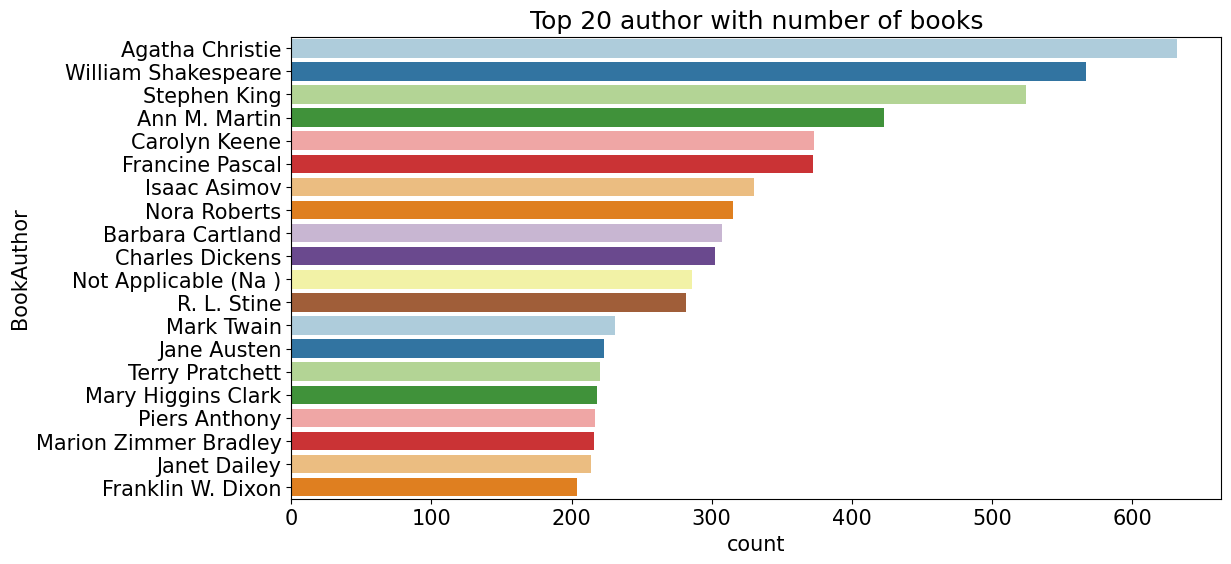

In [145]:
#Book Data
#Analysis no1:
#Which are the top Author with number of books ?

plt.figure(figsize=(12,6))
sns.countplot(y="BookAuthor",palette = 'Paired', data=book_data,order=book_data['BookAuthor'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")


Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

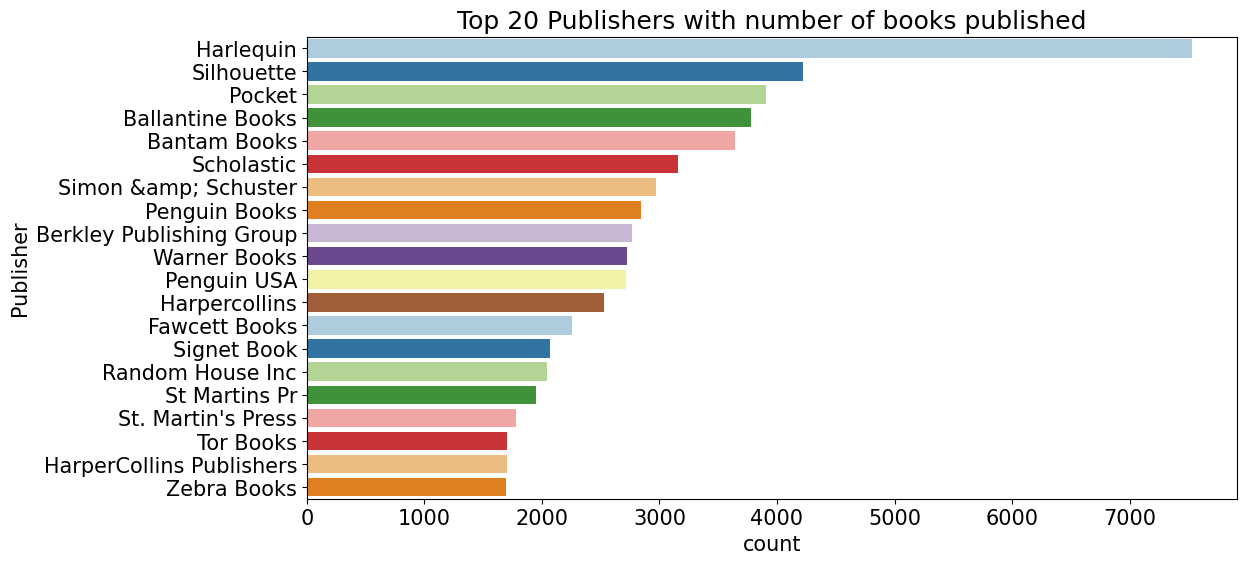

In [146]:
#analysis no2
#Which are top publishers with published books ?
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=book_data,order=book_data['Publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

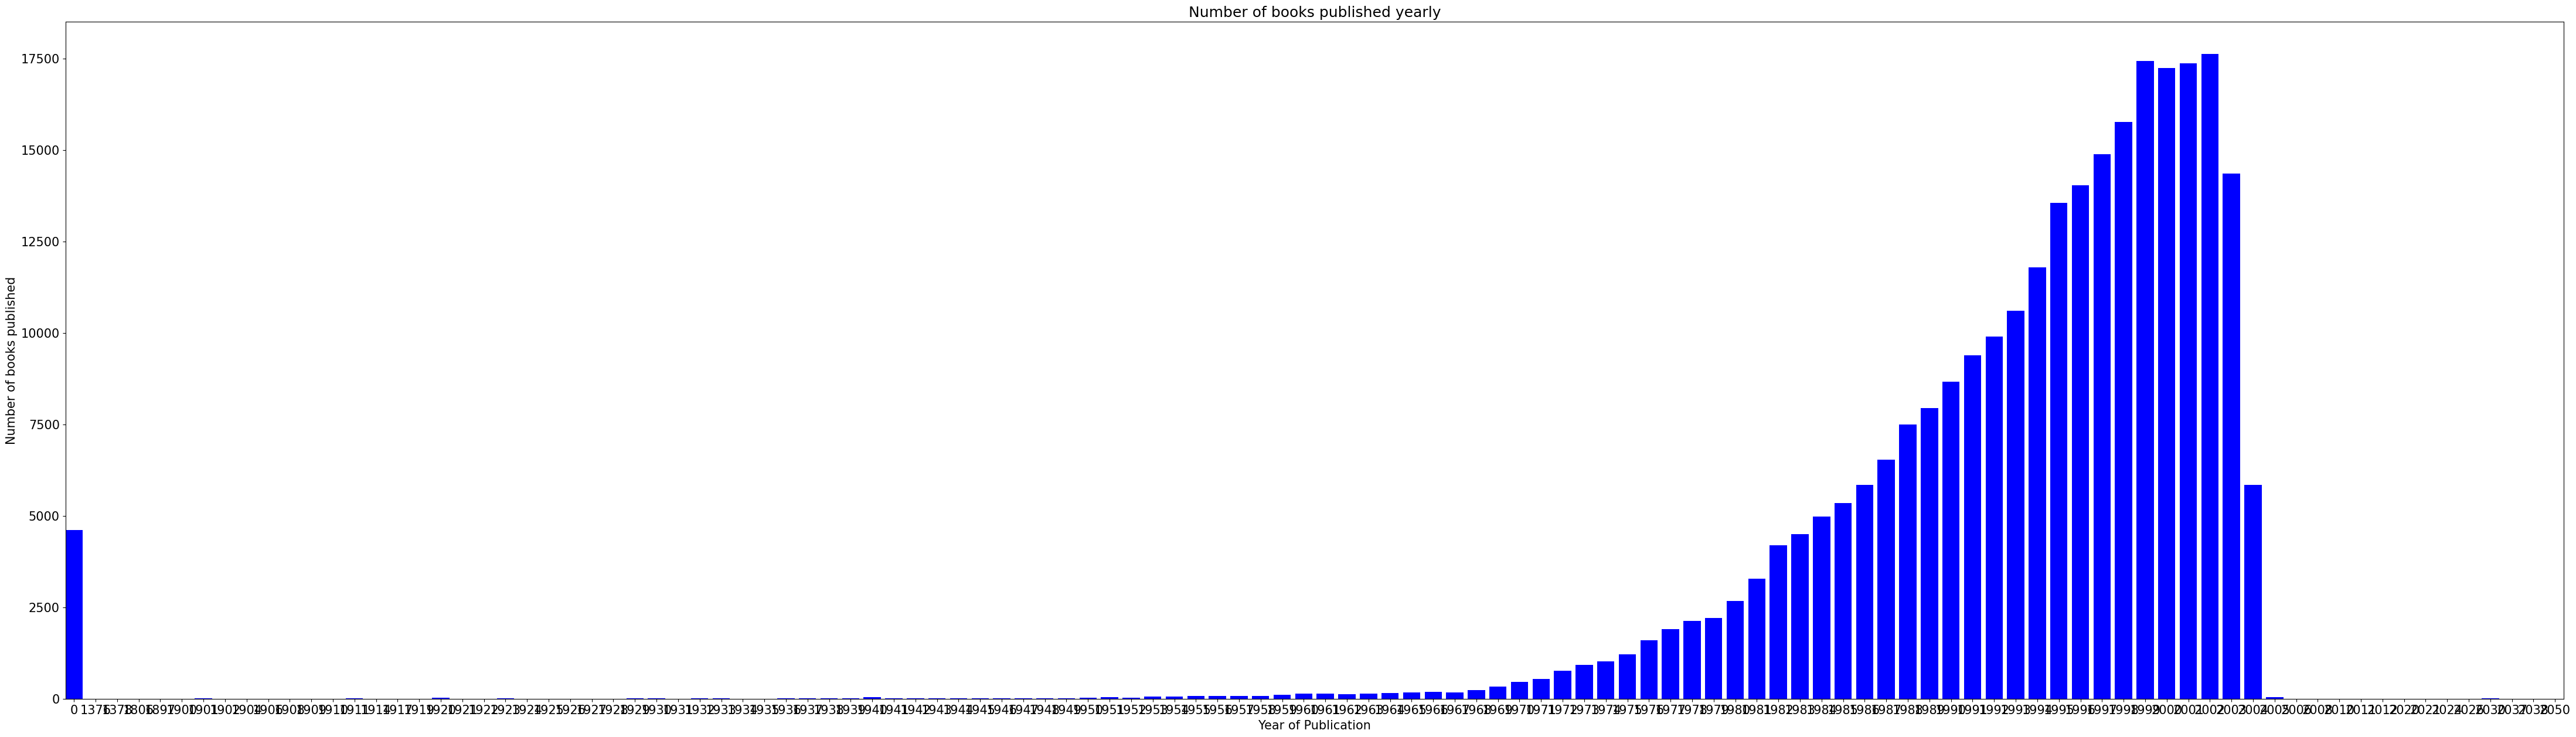

In [147]:
#analysis no3 :
#Number of Books published in yearly.
publications = {}
for year in book_data['YearOfPublication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [148]:
book_data.YearOfPublication = pd.to_numeric(book_data.YearOfPublication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.YearOfPublication == 0].YearOfPublication.count()
nan_year = book_data.YearOfPublication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.YearOfPublication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


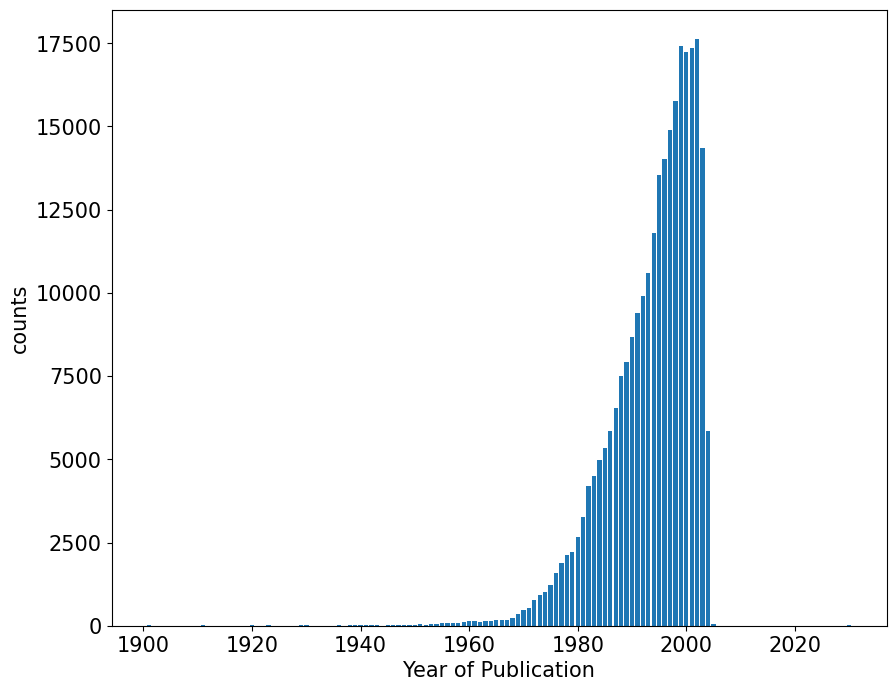

In [149]:
year = book_data.YearOfPublication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

## User data Dataset

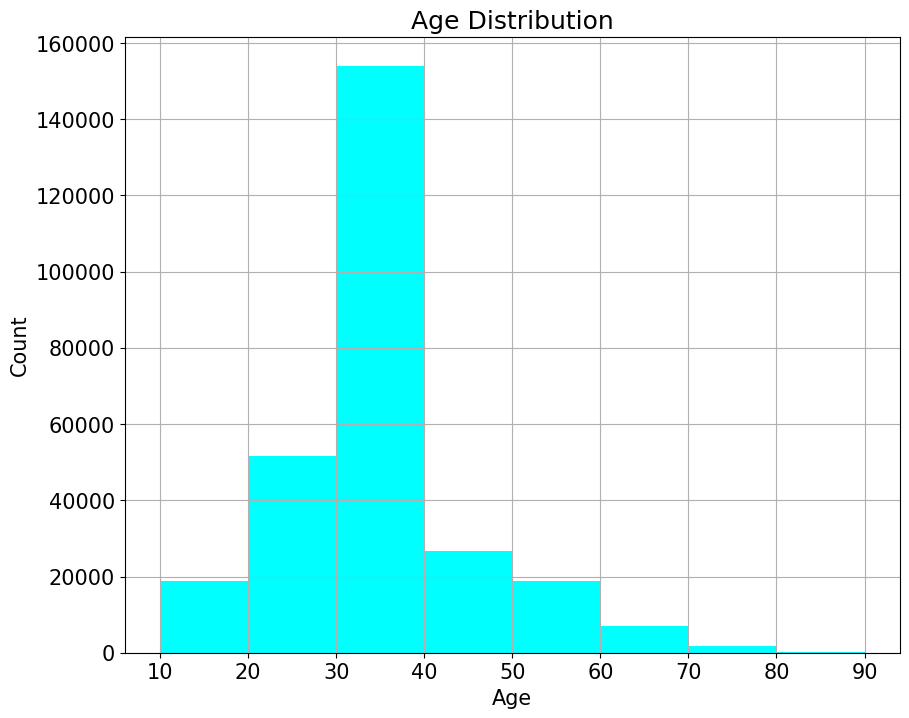

In [150]:
#analysis no4
#Age distributions pf users_data
plt.figure(figsize=(10,8))
users_data.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Ratings data dataset

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

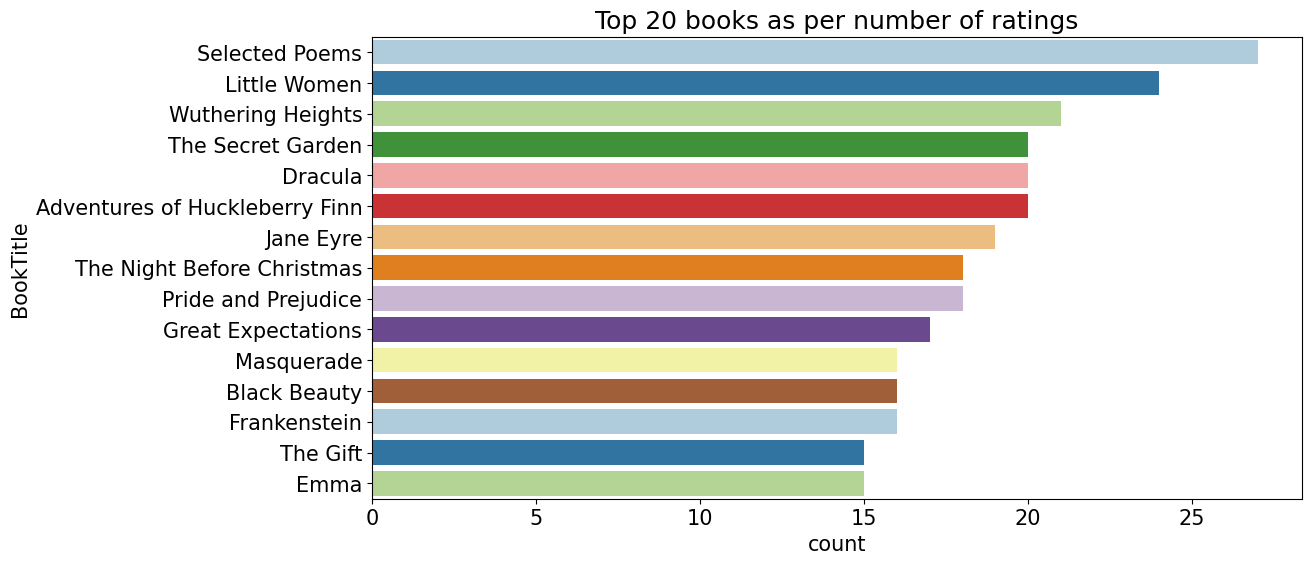

In [151]:
#Analysis no5
#what are top 20 books as per number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="BookTitle",palette = 'Paired',data= book_data, order=book_data['BookTitle'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='BookRating', ylabel='count'>

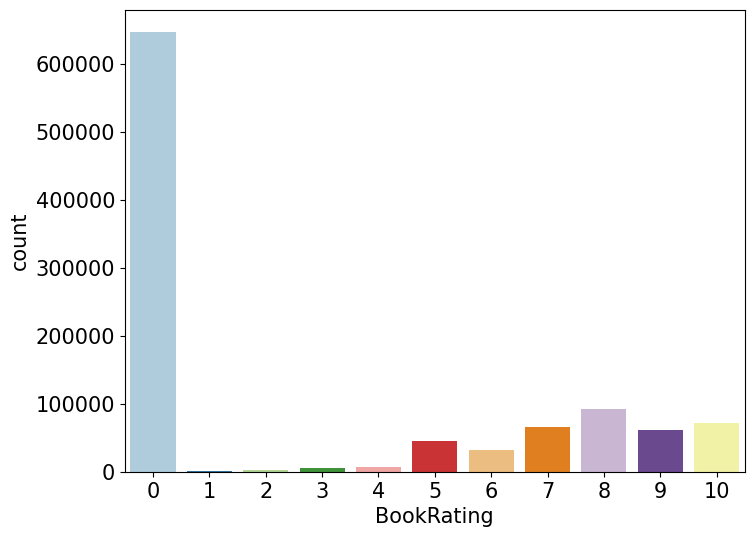

In [152]:
plt.figure(figsize=(8,6))
sns.countplot(x="BookRating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

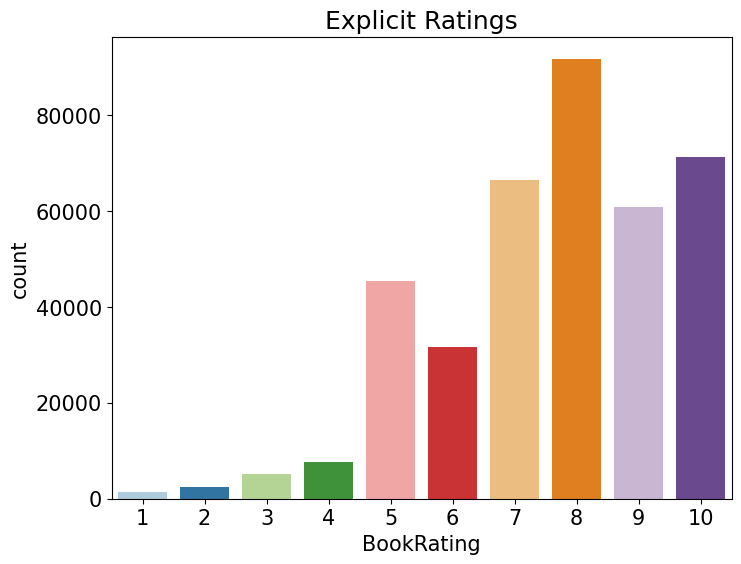

In [153]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['BookRating'] != 0]
sns.countplot(x="BookRating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

## Recommendations system

In [154]:
ratings_explicit= unique_ratings[unique_ratings['BookRating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['BookRating'] == 0]   # implicit ratings represented by 0

In [155]:
ratings_explicit.head()

,UserID,ISBN,BookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [156]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [157]:
book_data

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg


In [158]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='ISBN')
new_book_df.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM,UserID,BookRating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,123629,9


In [159]:
print(new_book_df.shape)

(383842, 8)


In [160]:
new_book_df['BookTitle'].count()

383842

In [161]:
new_book_df['BookTitle'].nunique()

135567

In [189]:
import requests

# top ten books as per book ratings and recommendation
top_ten_books = new_book_df.groupby(['BookTitle', 'BookAuthor', 'ImageURLM'])['BookRating'].count() \
                           .sort_values(ascending=False).head(50)
print('The top ten books as per ratings : ')
print(top_ten_books)

# Reset index to include 'BookTitle', 'BookAuthor', 'ImageURLM' as columns
top_ten_books = top_ten_books.reset_index()

# Convert DataFrame to JSON
top_ten_books_json = top_ten_books.to_json(orient='records')

flask_api_url = "http://127.0.0.1:5000/receive_recommendations"
response = requests.post(flask_api_url, json=top_ten_books_json)
print(response.text)



The top ten books as per ratings : 
BookTitle                                                                  BookAuthor              ImageURLM                                                   
The Lovely Bones: A Novel                                                  Alice Sebold            http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg    707
Wild Animus                                                                Rich Shapero            http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg    581
The Da Vinci Code                                                          Dan Brown               http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg    487
The Red Tent (Bestselling Backlist)                                        Anita Diamant           http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg    383
Divine Secrets of the Ya-Ya Sisterhood: A Novel                            Rebecca Wells           http://images.amazon.com/images/P/006

{
  "message": "Recommendations stored successfully"
}

